Text(0, 0.5, 'Velocity (m/s)')

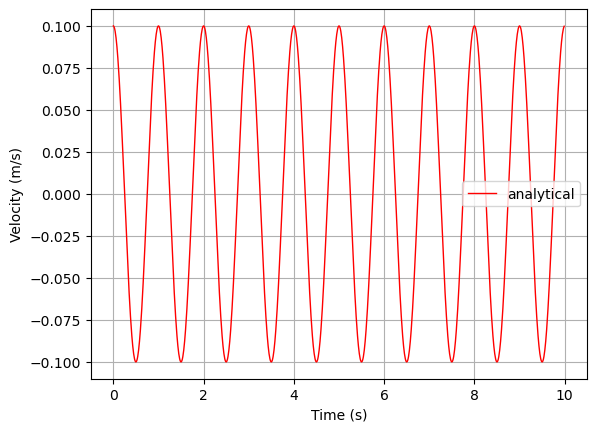

In [7]:
import jax.numpy as jnp
import matplotlib.pyplot as plt


def analytical_vibration(E, rho, v0, x_loc, duration, dt, L):
    t = jnp.arange(0, duration, dt)
    omega = 1 / L * jnp.sqrt(E / rho)
    v = v0 * jnp.cos(omega * t)
    x = x_loc * jnp.exp(v0 / (L * omega) * jnp.sin(omega * t))
    return x, v, t


E = 4 * jnp.pi**2
x, v, t = analytical_vibration(E, 1, 0.1, 1, 10, 0.01, 1)

fig, ax = plt.subplots()
ax.plot(t, v, "r", linewidth=1, label="analytical")
ax.grid()
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")

In [9]:
from diffmpm.mesh import Mesh1D
from diffmpm.material import Material

material = Material(E, 1)
mesh = Mesh1D(1, material, 1, jnp.array([0]), ppe=1)
velocity = jnp.array([0.1])
mesh.set_particle_velocity(velocity)
dt = 0.01
nsteps = int(10 / dt)
result = mesh.solve(dt=dt, nsteps=nsteps, mpm_scheme="USF")

100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


In [10]:
result

{'position': Array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 'velocity': Array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=int32)}

In [6]:
testarr = jnp.array([[0,1,3,4],[5,6,7,8]])
testarr.reshape(-1,1)

Array([[0],
       [1],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]], dtype=int32)

In [10]:
result['velocity']

Array([[ 0.09960482],
       [ 0.09881524],
       [ 0.09763361],
       [ 0.09606385],
       [ 0.09411147],
       [ 0.09178353],
       [ 0.08908865],
       [ 0.08603695],
       [ 0.08264005],
       [ 0.07891104],
       [ 0.07486437],
       [ 0.07051589],
       [ 0.06588271],
       [ 0.06098317],
       [ 0.05583677],
       [ 0.05046409],
       [ 0.04488668],
       [ 0.03912699],
       [ 0.03320829],
       [ 0.02715452],
       [ 0.02099025],
       [ 0.01474052],
       [ 0.00843075],
       [ 0.00208664],
       [-0.00426598],
       [-0.01060122],
       [-0.01689327],
       [-0.02311652],
       [-0.02924567],
       [-0.03525583],
       [-0.04112263],
       [-0.04682234],
       [-0.05233198],
       [-0.05762938],
       [-0.06269332],
       [-0.06750359],
       [-0.07204107],
       [-0.07628784],
       [-0.0802272 ],
       [-0.0838438 ],
       [-0.08712362],
       [-0.0900541 ],
       [-0.09262412],
       [-0.09482406],
       [-0.09664585],
       [-0

Text(0, 0.5, 'Velocity (m/s)')

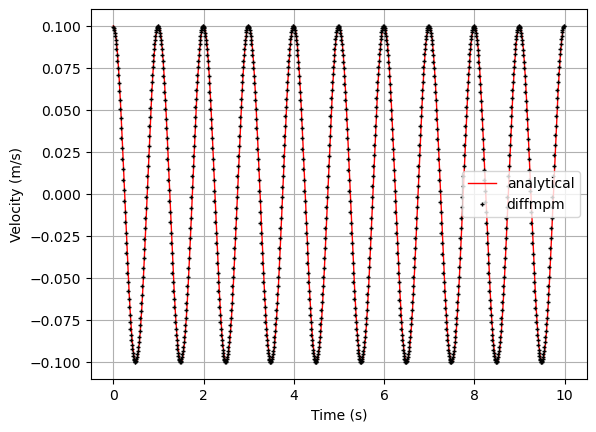

In [5]:
fig, ax = plt.subplots()
ax.plot(t, v, "r", linewidth=1, label="analytical")
ax.plot(t, result["velocity"], "k+", markersize=3, label="diffmpm")
ax.grid()
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")

In [6]:
from diffmpm.material import Material
from jax.tree_util import tree_structure, tree_flatten, tree_unflatten
def show_example(structured):
  flat, tree = tree_flatten(structured)
  unflattened = tree_unflatten(tree, flat)
  print(f"{structured=}\n  {flat=}\n  {tree=}\n  {unflattened=}")

show_example(Material(2, 1))

structured=Material(E=2, density=1)
  flat=[]
  tree=PyTreeDef(CustomNode(Material[(2, 1)], []))
  unflattened=Material(E=2, density=1)


In [7]:
class RegisteredMaterial(Material):
    def _tree_flatten(self):
        children = tuple()
        aux_data = {"E": self.E, "density": self.density}
        return (children, aux_data)

    @classmethod
    def _tree_unflatten(cls, aux_data, children):
        return cls(*children, **aux_data)


from jax import tree_util

tree_util.register_pytree_node(
    RegisteredMaterial,
    RegisteredMaterial._tree_flatten,
    RegisteredMaterial._tree_unflatten,
)

In [8]:
print(show_example(RegisteredMaterial(2, 1)))

structured=Material(E=2, density=1)
  flat=[]
  tree=PyTreeDef(CustomNode(RegisteredMaterial[{'E': 2, 'density': 1}], []))
  unflattened=Material(E=2, density=1)
None


In [9]:
from diffmpm.material import Material
from diffmpm.particle import Particles

show_example(Particles(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1))

structured=Particles(nparticles=1)
  flat=[Array([1.], dtype=float32), 1, 1, Array([1.], dtype=float32), 1, 1, 1, 1, 1, 1, 1]
  tree=PyTreeDef(CustomNode(Particles[{'material': None, 'ppe': 1, 'nelements': 1, 'nparticles': 1}], [*, *, *, *, *, *, *, *, *, *, *]))
  unflattened=Particles(nparticles=1)
